In [1]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model, save_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib widget

from keras.utils.vis_utils import model_to_dot, plot_model

from tqdm import tqdm_notebook

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.1
RANDOM_STATE = 58

#Model
NO_EPOCHS = 100
BATCH_SIZE = 128

In [4]:
def plot_images(images, labels, head):
    plt.figure(figsize=(12,12))
    plt.title(head)
    for i in tqdm_notebook(range(10)):
        imgs = images[np.where(labels == i)]
        lbls = labels[np.where(labels == i)]
        for j in range(10):
            plt.subplot(10,10,i*10+j+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(imgs[j], cmap=plt.cm.binary)
            plt.xlabel(lbls[j])

Below code to download from net

In [ ]:
%run "C:\Users\vasus\Desktop\ANN\Kuzushiji-MNIST Classification\KMNIST\download_data.py"

In [31]:
x_train = np.load('kmnist-train-imgs.npz')['arr_0']
print("KMNIST train shape:", x_train.shape)

x_test = np.load('kmnist-test-imgs.npz')['arr_0']
print("KMNIST test shape:", x_test.shape)

y_train = np.load('kmnist-train-labels.npz')['arr_0']
print("KMNIST train shape:", y_train.shape)

y_test = np.load('kmnist-test-labels.npz')['arr_0']
print("KMNIST test shape:", y_test.shape)

KMNIST train shape: (60000, 28, 28)
KMNIST test shape: (10000, 28, 28)
KMNIST train shape: (60000,)
KMNIST test shape: (10000,)


Below code to download dataset from file

In [5]:
x_train = np.load(r"C:\Users\vasus\Desktop\ANN\Kuzushiji-MNIST Classification\KMNIST\kmnist-train-imgs.npz")['arr_0']
print("KMNIST train shape:", x_train.shape)

x_test = np.load(r"C:\Users\vasus\Desktop\ANN\Kuzushiji-MNIST Classification\KMNIST\kmnist-test-imgs.npz")['arr_0']
print("KMNIST test shape:", x_test.shape)

y_train = np.load(r"C:\Users\vasus\Desktop\ANN\Kuzushiji-MNIST Classification\KMNIST\kmnist-train-labels.npz")['arr_0']
print("KMNIST train shape:", y_train.shape)

y_test = np.load(r"C:\Users\vasus\Desktop\ANN\Kuzushiji-MNIST Classification\KMNIST\kmnist-test-labels.npz")['arr_0']
print("KMNIST test shape:", y_test.shape)

KMNIST train shape: (60000, 28, 28)
KMNIST test shape: (10000, 28, 28)
KMNIST train shape: (60000,)
KMNIST test shape: (10000,)


In [6]:
char_df = pd.read_csv(r'C:\Users\vasus\Desktop\ANN\Kuzushiji-MNIST Classification\KMNIST\kmnist_classmap.csv', encoding = 'utf-8')
char_df
#char_df.plot(kind = 'bar', x = 'char')
#plt.title('Symbol Distribution')
#plt.show()

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


C:\Users\vasus\AppData\Local\Temp\ipykernel_20804\3302935572.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

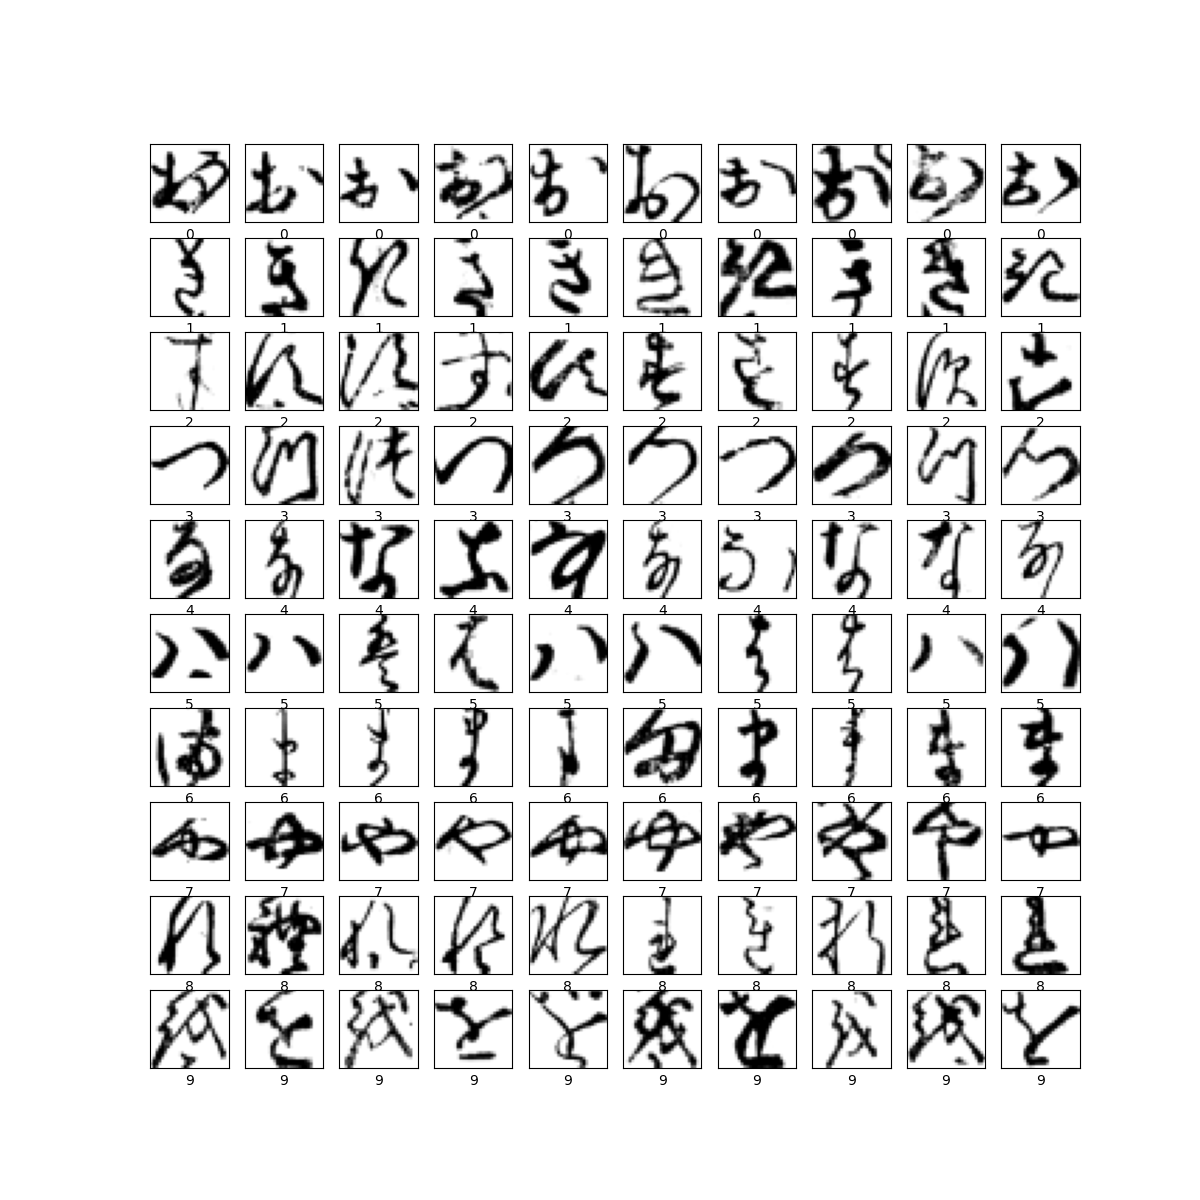

In [7]:
plot_images(x_train, y_train, 'Training set data')

C:\Users\vasus\AppData\Local\Temp\ipykernel_20804\3302935572.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

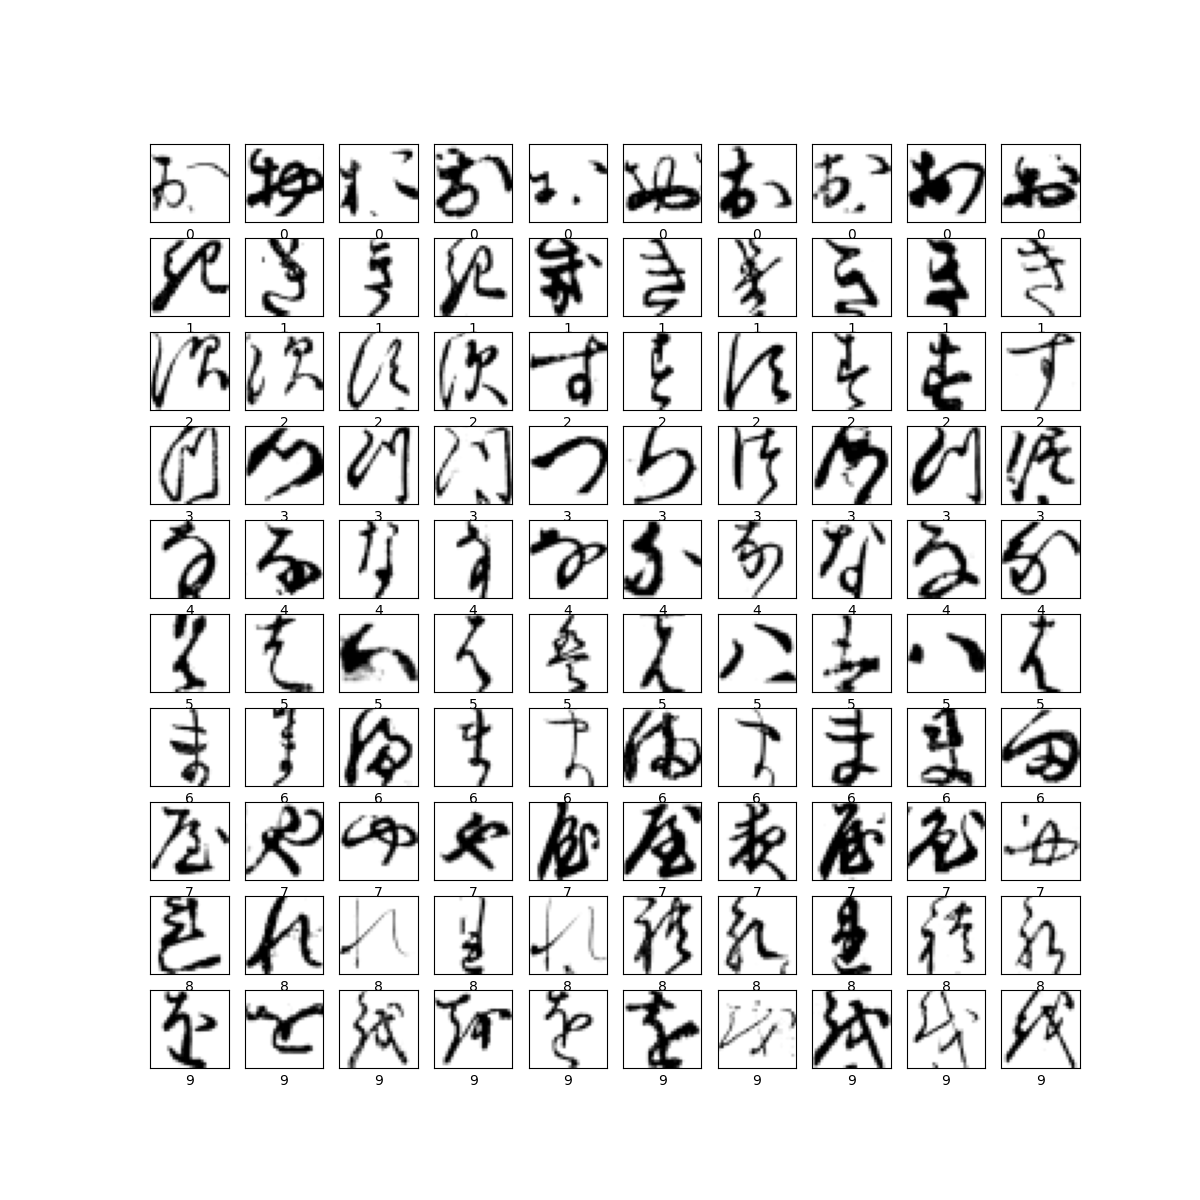

In [8]:
plot_images(x_test, y_test, 'Testing set data')

In [9]:
# data preprocessing
def data_preprocessing(images, labels):
    out_y = keras.utils.to_categorical(labels, NUM_CLASSES)
    num_images = images.shape[0]
    x_shaped_array = images.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [10]:
x_train, y_train = data_preprocessing(x_train, y_train)
x_test, y_test = data_preprocessing(x_test, y_test)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [12]:
print("KMNIST train    -    Rows:{row}    Columns:{col}".format(row=x_train.shape[0], col=x_train.shape[1:]))
print("KMNIST validate -    Rows: {row}    Columns:{col}".format(row=x_val.shape[0], col=x_val.shape[1:]))
print("KMNIST test     -    Rows:{row}    Columns:{col}".format(row=x_test.shape[0], col=x_test.shape[1:]))

KMNIST train    -    Rows:54000    Columns:(28, 28, 1)
KMNIST validate -    Rows: 6000    Columns:(28, 28, 1)
KMNIST test     -    Rows:10000    Columns:(28, 28, 1)


In [13]:
%run "C:\Users\vasus\Desktop\ANN\Kuzushiji-MNIST Classification\class imbalance.py"

C:\Users\vasus\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


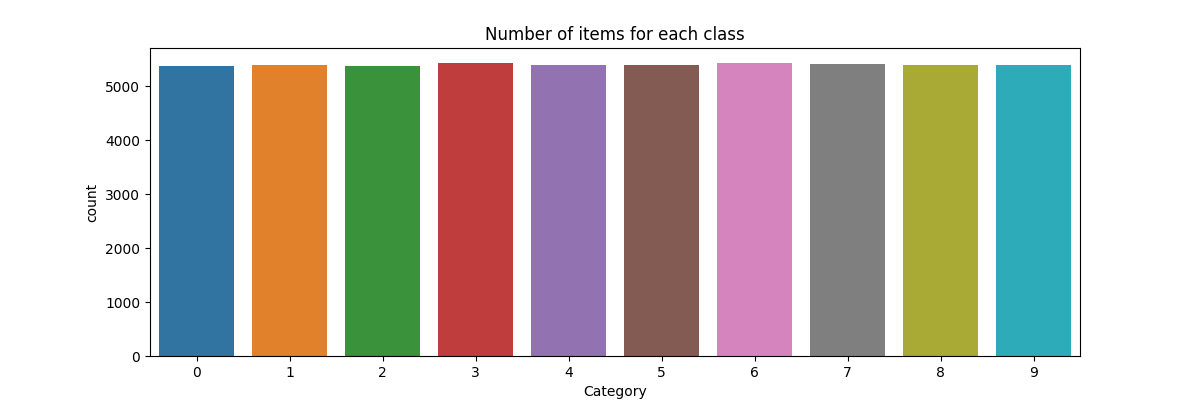

3(つ):   5434 or 10.062962962962963%
6(ま):   5431 or 10.057407407407409%
7(や):   5417 or 10.031481481481482%
5(は):   5394 or 9.988888888888889%
8(れ):   5394 or 9.988888888888889%
4(な):   5393 or 9.987037037037037%
9(を):   5392 or 9.985185185185186%
1(き):   5391 or 9.983333333333333%
0(お):   5380 or 9.962962962962962%
2(す):   5374 or 9.951851851851853%


In [14]:
plot_count_per_class(np.argmax(y_train, axis=1))
get_count_per_class(np.argmax(y_train,axis=1), char_df)

C:\Users\vasus\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


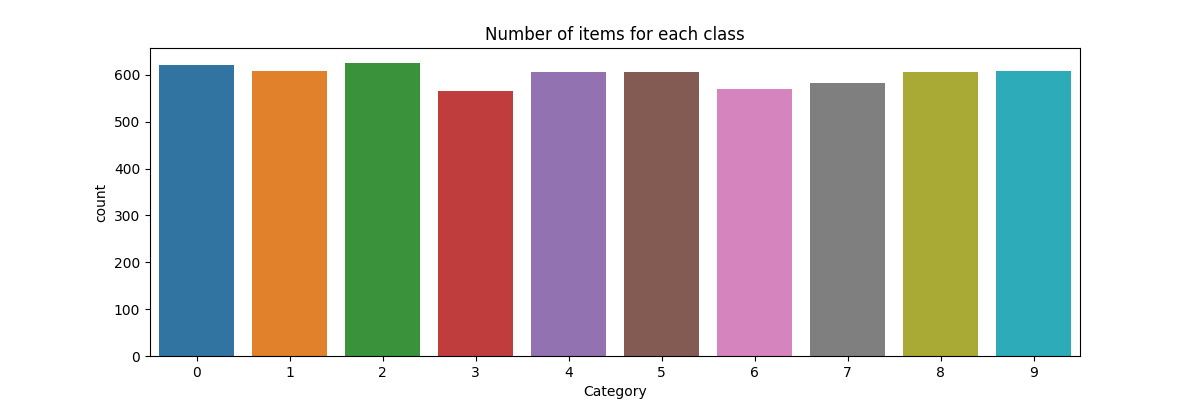

2(す):   626 or 10.433333333333334%
0(お):   620 or 10.333333333333334%
1(き):   609 or 10.15%
9(を):   608 or 10.133333333333333%
4(な):   607 or 10.116666666666667%
8(れ):   606 or 10.100000000000001%
5(は):   606 or 10.100000000000001%
7(や):   583 or 9.716666666666667%
6(ま):   569 or 9.483333333333334%
3(つ):   566 or 9.433333333333334%


In [15]:
plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1), char_df)

In [16]:
model = Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))
# model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.4))
# model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
# model.add(BatchNormalization())
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [17]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [19]:
history = model.fit(x_train, y_train, batch_size=128, epochs = 100, verbose = 1, validation_data=(x_val, y_val), validation_split=0.4)

Epoch 1/100
254/254 [==============================] - 11s 18ms/step - loss: 0.5542 - accuracy: 0.8292 - val_loss: 0.3131 - val_accuracy: 0.9453
Epoch 2/100
254/254 [==============================] - 4s 15ms/step - loss: 0.2028 - accuracy: 0.9390 - val_loss: 0.1912 - val_accuracy: 0.9660
Epoch 3/100
254/254 [==============================] - 4s 15ms/step - loss: 0.1490 - accuracy: 0.9544 - val_loss: 0.1420 - val_accuracy: 0.9724
Epoch 4/100
254/254 [==============================] - 4s 15ms/step - loss: 0.1137 - accuracy: 0.9636 - val_loss: 0.1288 - val_accuracy: 0.9764
Epoch 5/100
254/254 [==============================] - 4s 15ms/step - loss: 0.0977 - accuracy: 0.9697 - val_loss: 0.0981 - val_accuracy: 0.9781
Epoch 6/100
254/254 [==============================] - 4s 15ms/step - loss: 0.0820 - accuracy: 0.9735 - val_loss: 0.0971 - val_accuracy: 0.9793
Epoch 7/100
254/254 [==============================] - 4s 15ms/step - loss: 0.0678 - accuracy: 0.9778 - val_loss: 0.0921 - val_accuracy

In [20]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()

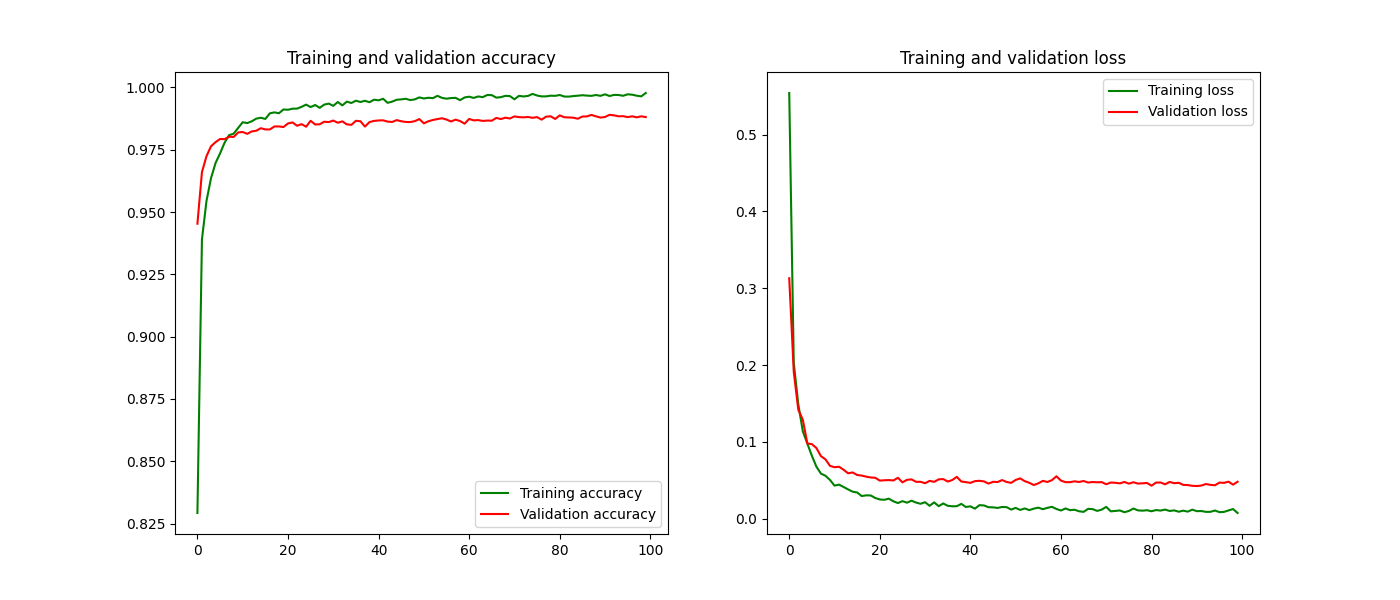

In [21]:
plot_accuracy_and_loss(history)